<a href="https://colab.research.google.com/github/KingsleyElo/ml-zoomcamp-notes/blob/main/Linear_Regression_ML_ZOOMCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook contains my notes while learning Linear Regression as part of ML Zoomcamp…

DATA PREPARATION

In [ ]:
data ='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [ ]:
!wget $data

--2026-01-13 08:21:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2026-01-13 08:21:33 (23.9 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
strings = list(df.dtypes [df.dtypes == 'object'].index)

In [ ]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


EXPLORATORY DATA ANALYSIS

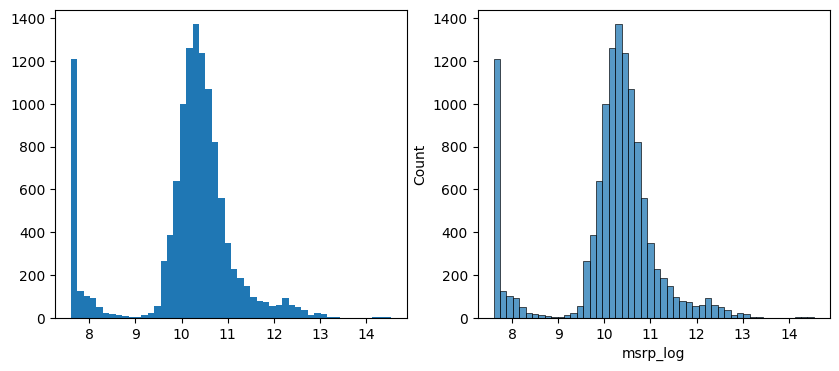

In [ ]:
%matplotlib inline
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
# apply log transformation to a variable, after adding one to each input value.
df['msrp_log'] = np.log1p(df['msrp'])
ax1.hist(df['msrp_log'], bins = 50)
sns.histplot(df['msrp_log'], bins = 50, ax=ax2)
plt.show()

In [ ]:
#check for null values
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


Setting Up The Validation Framework

In [ ]:
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = len(df) - n_val - n_test

In [ ]:
print(n_train, n_val, n_test)

7150 2382 2382


In [ ]:
# we need to randomise the selection
idx = np.arange(len(df))
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
print(len(df_train), len(df_val), len(df_test))

7150 2382 2382


In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Method 2 Train, Val, Test Split using train_test_split from sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('msrp', axis=1)
y = df['msrp']
x_main, x_test, y_main, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size = 0.25, random_state = 42)

print(len(x_train), len(x_val), len(x_test))

7148 2383 2383


Linear Regression

**Linear Regression equation:**
$$
y = mx + c ---- (1)
$$

```
where:

y = dependent variable (target)
m = slope
x = independent variable (feature)
c = intercept
```
> To get the line of best fit or solve the linear regression, we need to find the intercept(c) and the slope (m), and **gradient descent** can be used and **normal equation** can be used also to find the parameters for the line of best fit, that is, to find the points for the paramters that minimizes the sum of squared errors.

> **normal equation** is a shortcut that directly computes the paramters (slope and intercept) of the line that minimizes the sum of squared errors.

> **Gradient descent** walks to the bottom of the hill; the normal equation teleports you there (if the math allows it).


#### **Normal Equation (Linear Regression)**
#### **solving for the slope and intercept**

The normal equation gives the optimal regression parameters for linear regression:
$$
\theta = (X^{T} X)^{-1} X^{T} Y
$$

##### Definitions
- **θ**: Regression parameters (coefficients of the model)  
- **X**: Feature matrix (rows = samples, columns = features)  
- **Xᵀ**: Transpose of the feature matrix  
- **Y**: Target vector (values you want to predict)  
- **(XᵀX)⁻¹**: Inverse of the covariance matrix of features  

##### Explanation
- Computes **θ** that minimizes the Mean Squared Error (MSE) between predictions and true targets.  
- Provides a **closed-form solution**, no need for gradient descent.  

##### Intuition
1. \(XᵀX\) captures relationships among features.  
2. \((XᵀX)⁻¹\) adjusts for correlations between features.  
3. \(XᵀY\) measures the relationship between each feature and the target.  
4. Multiplying these gives θ, the best-fitting coefficients.  

##### Notes
- Works well with a small number of features.  
- Computationally heavy for large datasets.  
- \(XᵀX\) must be invertible; otherwise, regularization is needed.



In [ ]:
import numpy as np

x = np.array([1,2,3])
y = np.array([2,3,5])
print(x)
print(y)

[1 2 3]
[2 3 5]


In [ ]:
X = np.column_stack([np.ones(len(x)), x])
X

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [ ]:
# Transpose X
XT = X.T
XT

array([[1., 1., 1.],
       [1., 2., 3.]])

In [ ]:
# compute the Gram Matrix
XTX = XT@X
XTX

array([[ 3.,  6.],
       [ 6., 14.]])

In [ ]:
#find the inverse
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.33333333, -1.        ],
       [-1.        ,  0.5       ]])

In [ ]:
# compute XTY
XTY = XT@y
XTY

array([10., 23.])

In [ ]:
# compute theta and extract intercept and slope

theta = XTX_inv@XTY
theta

array([0.33333333, 1.5       ])

In [ ]:
c = float(round(theta[0], 2))
m = float(theta[1])

In [ ]:
x_new = [2,3,4]
y_new = [4,5,6]

def linear_regression(c,m,xi):
  y_list = []
  for x in xi:
    y = m*x + c
    y_list.append(y)
  return y_list

y_fit = linear_regression(c, m, x_new)
y_fit

[3.33, 4.83, 6.33]

Linear Regression Explantion 2:

```
x = [453, 11, 86]
y = 1000
```

Here, `x` represents some car features:

- 453 → mpg
- 11 → another feature
- 86 → popularity

`y` is the price. Our goal is to create a model trained on `x` that predicts something close to `y`.

$$
g(x) \approx y
$$

where:  
- \(g\) represents the model  
- \(x\) represents the car  
- \(y\) represents the price

we would be using linear regression model, hence,

$$
g(x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3
$$

Here:

`w0` is the intercept (also called the bias term)

`w1`, `w2`, `w3` are the weights (slopes) for each feature in `x`

`x1`, `x2`, `x3` are the individual features of the car

> The equation can also be written as such

$$
g(x_i) \approx \sum_j w_j x_{ij}
$$

where:  

- $g(x_i)$ → the predicted value for the i-th sample  
- $\sum_j w_j x_{ij}$ → sum of all features multiplied by their corresponding weights (slopes)



In [ ]:
w0 = 7.17
w = [0.01 ,0.04, 0.002]

xi = [453, 11, 86]

def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred += w[j] * xi[j]

  return pred

In [ ]:
round(float(np.expm1(linear_regression(xi))), 2)

222347.22

Linear Regression Vector Form